### Обработка результатов измерений "N2"

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [67]:
def readData(path): # Функция для считывания данных
    data = pd.read_table(path, sep = '\s+')
    x = data['x']
    y = data['y']
    return(x,y)

In [68]:
def plotData(path,title):
    x,y = readData(path)
    fig = plt.figure(figsize= (10,5)) 
    plt.title(title, size=15)
    plt.plot(x, y)
    plt.xlabel("$\lambda, нм$")
    plt.ylabel("Интенсивность")
    plt.grid()
    #fig.savefig(title+'.pdf', bbox_inches='tight', pad_inches=0)
    return x,y,fig
    



### Визуализация полученных результатов:

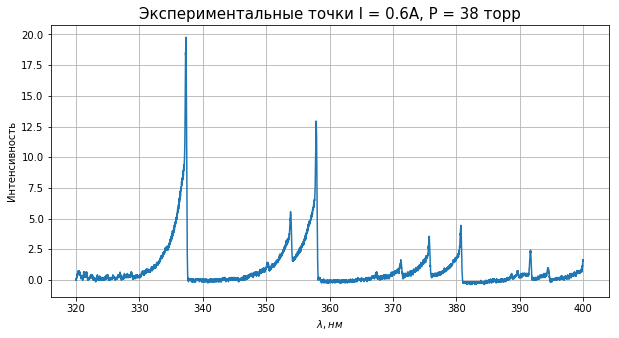

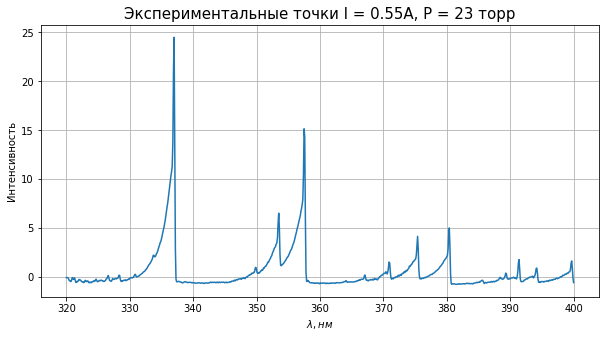

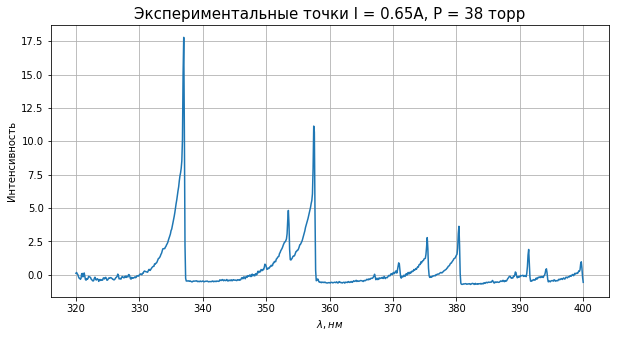

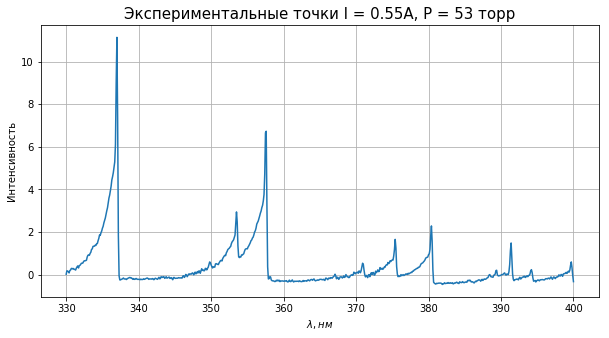

In [69]:
# Считываем полученные данные:
data_320_400_I06P95 ='/home/dmitry/LatexProjects/physicalMethods/N2/data/320_400_I06P95.mdrs'
data_320_400_I055_P97 ='/home/dmitry/LatexProjects/physicalMethods/N2/data/320_400_I055_P97.mdrs' 
data_320_400_I065_P95 = '/home/dmitry/LatexProjects/physicalMethods/N2/data/320_400_I065_P95.mdrs'
data_330_400_I055_P93 ='/home/dmitry/LatexProjects/physicalMethods/N2/data/330_400_I055_P93.mdrs'
data_332_338_I06P95 ='/home/dmitry/LatexProjects/physicalMethods/N2/data/332_338_I06P95.mdrs'
data_332_338_I055_P93 ='/home/dmitry/LatexProjects/physicalMethods/N2/data/332_338_I055_P93.mdrs'
data_96_0_55_00_20nm ='/home/dmitry/LatexProjects/physicalMethods/N2/data/96_0_55_00_20nm.mdrs'

x1,y1,fig1 = plotData(data_320_400_I06P95,"Экспериментальные точки I = 0.6A, P = 38 торр")
x2,y2,fig2 = plotData(data_320_400_I055_P97,"Экспериментальные точки I = 0.55A, P = 23 торр")
x3,y3,fig3, = plotData(data_320_400_I065_P95,"Экспериментальные точки I = 0.65A, P = 38 торр")
x4,y4,fig4 = plotData(data_330_400_I055_P93,"Экспериментальные точки I = 0.55A, P = 53 торр")

#plotData(data_332_338_I06P95,"Экспериментальные точки I = 0.6A, P = 38 торр")

#plotData(data_332_338_I055_P93,"file6")

#plotData(data_96_0_55_00_20nm,"file7")

### Проведем сравнение положения пиков:

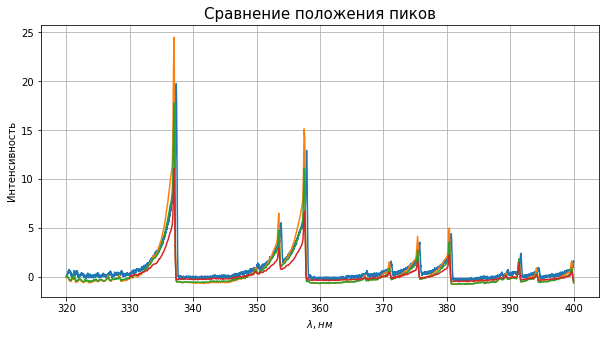

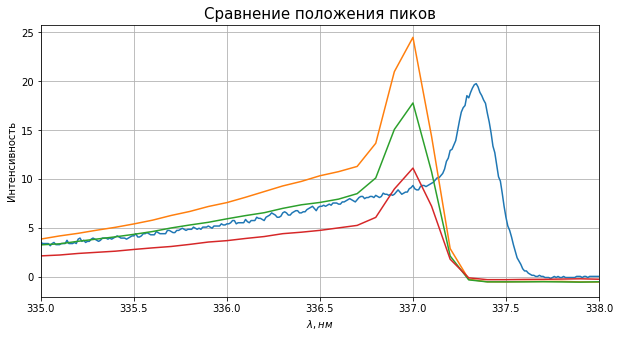

In [70]:
fig = plt.figure(figsize= (10,5)) 
plt.title("Сравнение положения пиков", size=15)
plt.plot(x1, y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.xlabel("$\lambda, нм$")
plt.ylabel("Интенсивность")
plt.grid()
#fig.savefig('p5.pdf', bbox_inches='tight', pad_inches=0)

fig = plt.figure(figsize= (10,5)) 
plt.title("Сравнение положения пиков", size=15)
plt.plot(x1, y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.xlabel("$\lambda, нм$")
plt.ylabel("Интенсивность")
plt.xlim(335,338)
plt.grid()
#fig.savefig('p6.pdf', bbox_inches='tight', pad_inches=0)


### Проведем идентификацию наблюдаемых полос:

In [71]:
from scipy.signal import find_peaks

In [72]:
def findPeaks(y):
    peaks, _ = find_peaks(y, distance=7, width=2)
    maxIndex = len(peaks)
    i = 0
    while(i<maxIndex):
        if(y[peaks[i]] < 0.42):
            peaks = np.delete(peaks,i)
            maxIndex-=1
            i-=1
        i+=1
    return peaks   

[3370.  3498.5 3535.  3575.  3709.  3754.  3804.  3914.  3942.  3997. ]


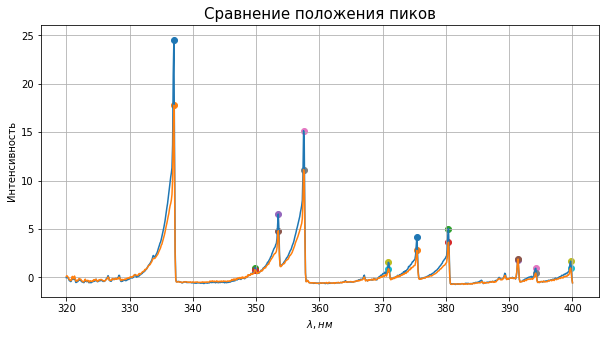

In [73]:


# Найдем положение наших пиков:
#peaks1 = findPeaks(y1)
peaks2 = findPeaks(y2)
peaks3 = findPeaks(y3)
#peaks4 = findPeaks(y4)

    
'''
plotData(data_320_400_I065_P95,"Экспериментальные точки I = 0.65A, P = 38 торр")
for i in range(len(peaks)):
    plt.scatter(x3[peaks[i]],y3[peaks[i]])

for i in range(len(peaks)):
    print(x3[peaks[i]]*10)
'''


fig = plt.figure(figsize= (10,5)) 
plt.title("Сравнение положения пиков", size=15)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel("$\lambda, нм$")
plt.ylabel("Интенсивность")

for i in range(len(peaks2)):
    #plt.scatter(x1[peaks1[i]],y1[peaks1[i]])
    plt.scatter(x2[peaks2[i]],y2[peaks2[i]])
    plt.scatter(x3[peaks3[i]],y3[peaks3[i]])
    #plt.scatter(x4[peaks4[i]],y4[peaks4[i]])

peaksFinal  = np.zeros(len(peaks2))

    
for i in range(len(peaks2)):
    peaksFinal[i] = (x2[peaks2[i]]+x3[peaks3[i]])/2
    


plt.grid()
peaksFinal.sort()
print(peaksFinal*10)

### Вычисление вращательной темпиратуры:

Для вычисления вращательной температуры выберем участок неразрешенной вращательной
структуры и прологарифмируем его. По наклону прямой зависимости $lgI = f(\lambda)$ , используя
рассчитанную зависимость тангенса угла наклона от значения вращательной температуры, определим значение вращательной температуры в центральной части разряда.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


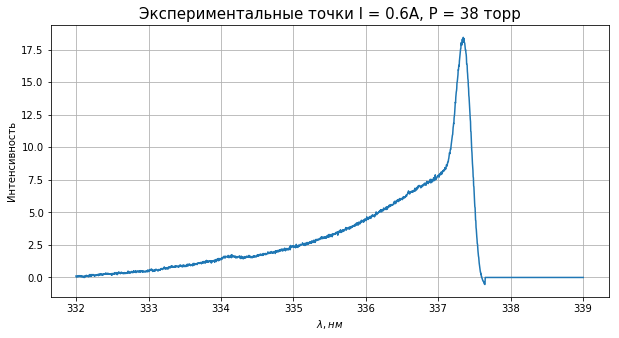

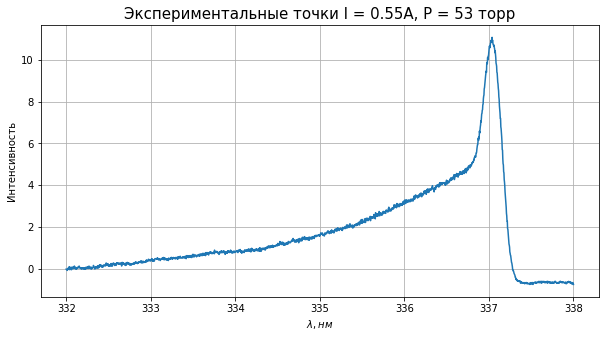

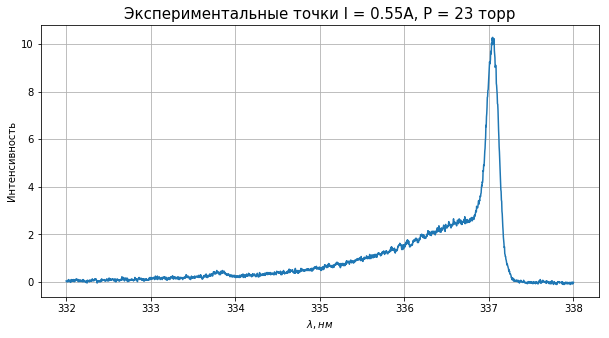

In [74]:
X1,Y1,fig4 = plotData(data_332_338_I06P95,"Экспериментальные точки I = 0.6A, P = 38 торр")

X2,Y2,fig5 = plotData(data_332_338_I055_P93,"Экспериментальные точки I = 0.55A, P = 53 торр")

X3,Y3,fig6 = plotData(data_96_0_55_00_20nm,"Экспериментальные точки I = 0.55A, P = 23 торр")


# Логарифмируем
Y1 = np.log10(Y1)
Y2 = np.log10(Y2)
Y3 = np.log10(Y3)

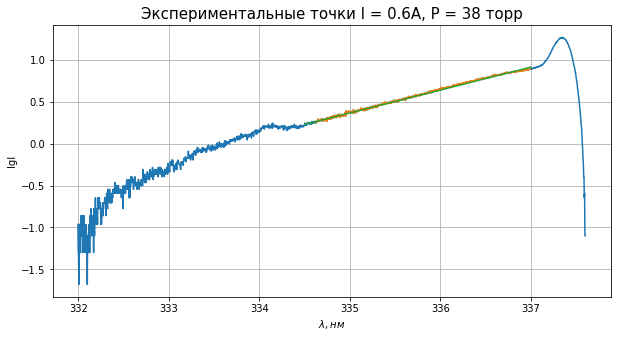

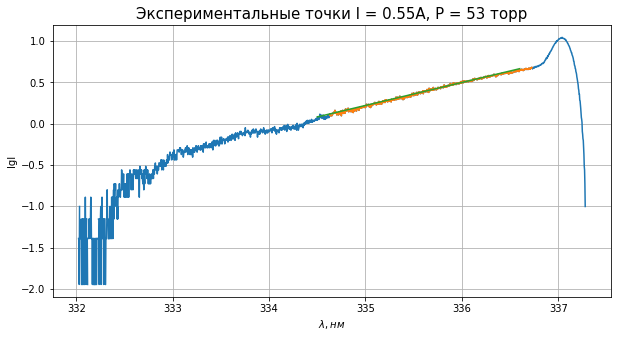

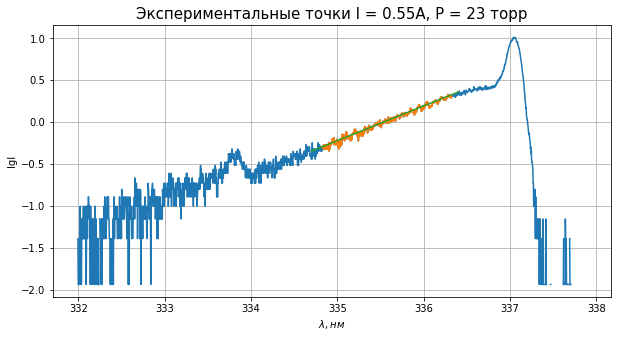

In [75]:
b1, intercept1, r_value1, p_value1, std_err1 = linregress(X1[790:1500], Y1[790:1500])
b2, intercept2, r_value2, p_value2, std_err2 = linregress(X2[790:1420], Y2[790:1420])
b3, intercept3, r_value3, p_value3, std_err3 = linregress(X3[850:1300], Y3[850:1300])

fig = plt.figure(figsize= (10,5)) 
plt.title("Экспериментальные точки I = 0.6A, P = 38 торр", size=15)
plt.plot(X1,Y1)
plt.plot(X1[790:1500], Y1[790:1500])
plt.plot([334.5,337],[0.2285,0.911])
plt.xlabel("$\lambda, нм$")
plt.ylabel("lgI")
plt.grid()
#fig.savefig('p7.pdf', bbox_inches='tight', pad_inches=0)
 
fig = plt.figure(figsize= (10,5)) 
plt.title("Экспериментальные точки I = 0.55A, P = 53 торр", size=15)
plt.plot(X2, Y2)
plt.plot(X2[790:1420],Y2[790:1420])
plt.plot([334.5,336.6],[0.081,0.6648])
plt.xlabel("$\lambda, нм$")
plt.ylabel("lgI")
plt.grid()
#fig.savefig('p8.pdf', bbox_inches='tight', pad_inches=0)

fig = plt.figure(figsize= (10,5)) 
plt.title("Экспериментальные точки I = 0.55A, P = 23 торр", size=15)
plt.plot(X3,Y3)
plt.plot(X3[850:1300], Y3[850:1300])
plt.plot([334.7,336.4],[-0.34379,0.36052])
plt.xlabel("$\lambda, нм$")
plt.ylabel("lgI")
plt.grid()
#fig.savefig('p9.pdf', bbox_inches='tight', pad_inches=0)

In [76]:
print(b1, intercept1, r_value1, p_value1, std_err1)
print(b2, intercept2, r_value2, p_value2, std_err2)
print(b3, intercept3, r_value3, p_value3, std_err3)
# Получаем значения вращательных темпиратур порядка 1300, 1300, 1000 K

0.2730232757421943 -91.0938398751529 0.9985845085913166 0.0 0.0005465288559945574
0.27799143962739264 -92.91660521134465 0.9973307884645064 0.0 0.0008121362003981466
0.4143006268027739 -139.01941814978582 0.9898327040709979 0.0 0.0028127154513328868


### Определение колебательной темпиратуры:



In [77]:
# plt.fill_between(x,y, alpha=0.4)

In [78]:
#x2,y2
y2 = np.array(y2)
x2 = np.array(x2)
miny2 = min(y2)
for i in range(len(y2)):
    y2[i]-=miny2

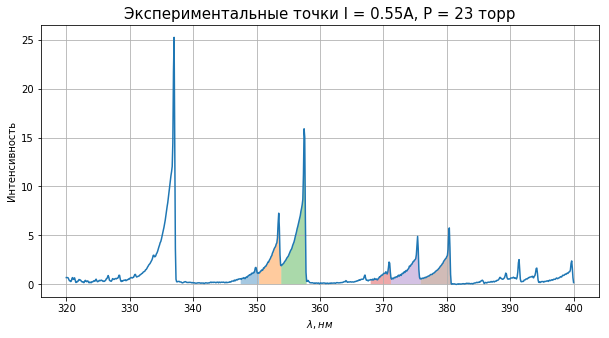

In [79]:
fig = plt.figure(figsize= (10,5)) 
plt.title("Экспериментальные точки I = 0.55A, P = 23 торр", size=15)
plt.plot(x2,y2)
plt.fill_between(x2[275:305],y2[275:305], alpha=0.4)
plt.fill_between(x2[304:340],y2[304:340], alpha=0.4)
plt.fill_between(x2[339:380],y2[339:380], alpha=0.4)
plt.fill_between(x2[480:513],y2[480:513], alpha=0.4)
plt.fill_between(x2[512:560],y2[512:560], alpha=0.4)
plt.fill_between(x2[559:610],y2[559:610], alpha=0.4)
plt.xlabel("$\lambda, нм$")
plt.ylabel("Интенсивность")
plt.grid()
fig.savefig('p10.pdf', bbox_inches='tight', pad_inches=0)

In [80]:
# Выбираем данные для рассчета площадей:
x_blue,y_blue = x2[275:305],y2[275:305]
x_orange,y_orange = x2[304:340],y2[304:340]
x_green,y_green = x2[339:380],y2[339:380]
x_pink,y_pink = x2[480:513],y2[480:513]
x_violet,y_violet = x2[512:560],y2[512:560]
x_brown,y_brown = x2[559:610],y2[559:610]

In [81]:
# Функция для рассчета площади
def getSquare(x,y):
    S = 0
    N = len(x)
    h = (max(x) - min(x))/N
    for i in range(N):
        S+=y[i]*h
    return S    

In [82]:
S_blue = getSquare(x_blue,y_blue)
S_orange = getSquare(x_orange,y_orange)
S_green = getSquare(x_green,y_green)
S_pink = getSquare(x_pink,y_pink)
S_violet = getSquare(x_violet,y_violet)
S_brown = getSquare(x_brown,y_brown)
print("S2_3 = ",S_blue.round(2))
print("S1_2 = ",S_orange.round(2))
print("S0_1 = ",S_green.round(2))
print("S2_4 = ",S_pink.round(2))
print("S1_3 = ",S_violet.round(2))
print("S0_2 = ",S_brown.round(2))

S2_3 =  2.85
S1_2 =  9.83
S0_1 =  19.71
S2_4 =  2.92
S1_3 =  7.06
S0_2 =  7.8


In [83]:
# Серия 1
S0_1 = S_green
S1_2 = S_orange
S2_3 = S_blue
# Серия 2
S0_2 = S_brown
S1_3 = S_violet
S2_4 = S_pink

In [84]:
x12 = np.array([1016.7,3011.1,4951.9])*1.37/0.6925# K
y1 = np.zeros(3)
y2 = np.zeros(3)

y1[0] = np.log(S0_1*3575**4/0.3291)
y1[1] = np.log(S1_2*3535**4/0.2033)
y1[2] = np.log(S2_3*3499**4/0.06345)

y2[0] = np.log(S0_2*(3804)**4/0.1462)
y2[1] = np.log(S1_3*(3754)**4/0.1990)
y2[2] = np.log(S2_4*(3709)**4/0.1605)

k1, c1, r_value1, p_value1, std_err1 = linregress(x12, y1)
k2, c2, r_value2, p_value2, std_err2 = linregress(x12, y2)

print((k1**-1*-1).round(0))
print((k2**-1*-1).round(0))
k1,k2,c1,c2

20707.0
6614.0


(-4.829323539463092e-05,
 -0.00015118868184396867,
 36.89402776392264,
 37.30055377479968)

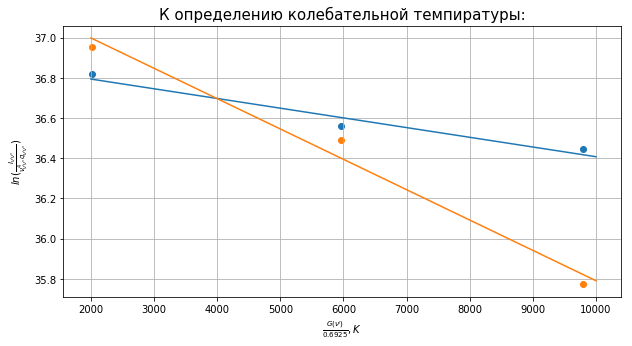

In [87]:
fig = plt.figure(figsize= (10,5)) 
plt.title("К определению колебательной темпиратуры:", size=15)
plt.scatter(x12,y1)
plt.scatter(x12,y2)
plt.plot([2000,10000],[2000*-4.829*10**-5+36.89,0.1*-4.829+36.89])
plt.plot([2000,10000],[-0.000151*2000+37.3,-0.000151*10000+37.3])
plt.xlabel("$\\frac{G(\\nu^{\\prime})}{0.6925},K$")
plt.ylabel("$ln(\\frac{I_{\\nu^{\\prime}\\nu^{\\prime \\prime}}}{\\nu^4_{\\nu^{\prime}\\nu^{\\prime \\prime}}q_{\\nu^{\\prime}\\nu^{\\prime \\prime}}})$")
plt.grid()
fig.savefig('p11.pdf', bbox_inches='tight', pad_inches=0)